In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')#Realworld Dataset

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.shape

(19158, 13)

In [8]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


we can't apply CCA on gender, major_discipline,company type, company_size


In [10]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

i.e. we can apply our CCA on the cols only having missing valuses less than 5% only



In [11]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
11186,0.550,Full time course,Graduate,5.0,196.0
16883,0.920,no_enrollment,Graduate,20.0,31.0
10217,0.920,no_enrollment,Graduate,9.0,78.0
3226,0.682,no_enrollment,Graduate,6.0,10.0
5052,0.920,no_enrollment,Graduate,16.0,12.0


In [12]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

i.e. we will be having 89% data after removal of all the missing value rows!

In [14]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

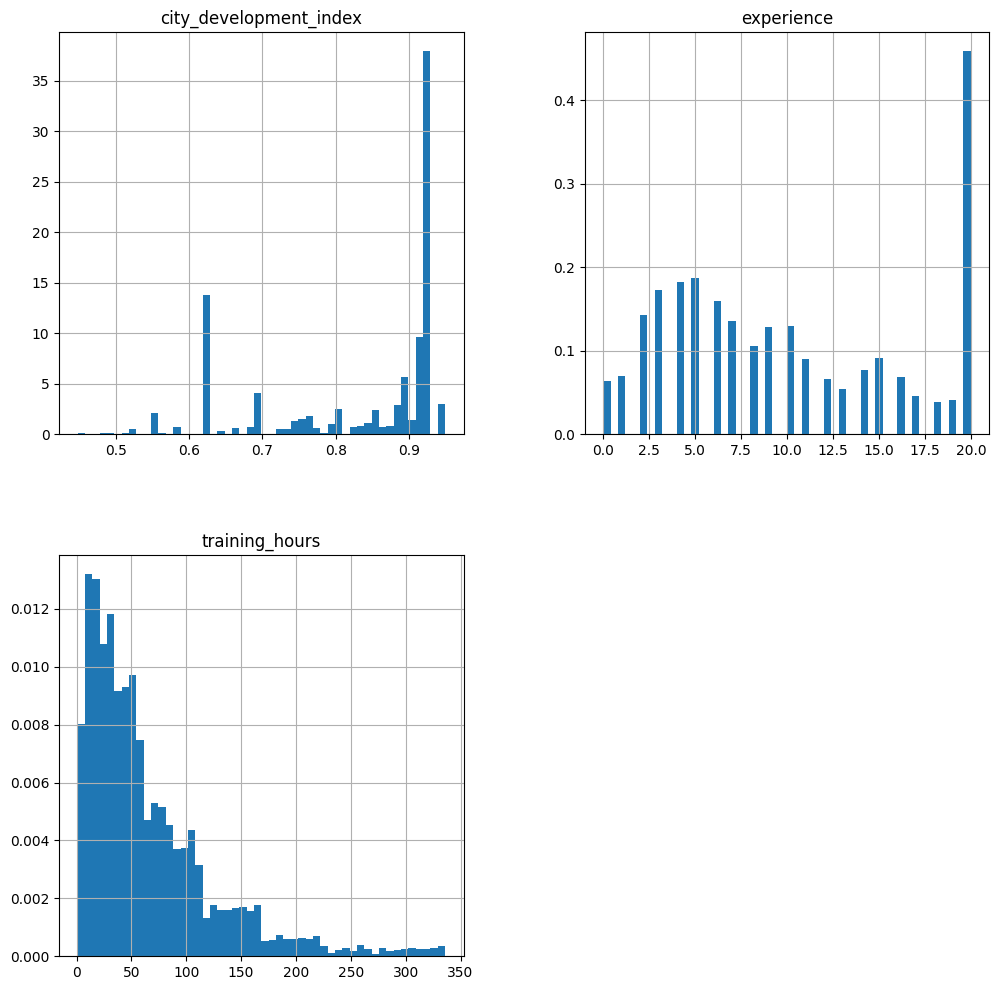

In [15]:
new_df.hist(bins=50, density=True, figsize=(12,12))
plt.show()

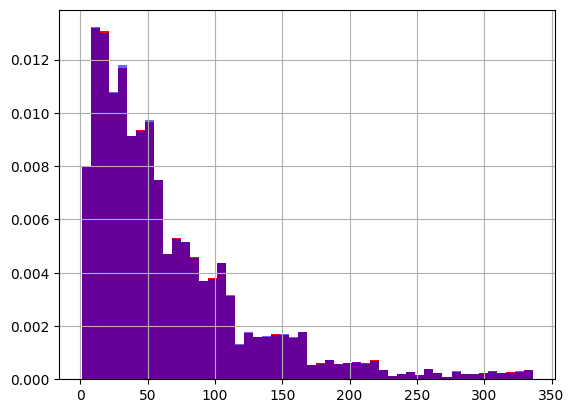

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
#original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

#data after CCA, the arguement alpha makes the color transparent, so we can see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='blue', alpha=0.6)
plt.show()

So the distributions nearly overlaps and thus data was MCAR

####Categorical Columns

In [23]:
temp = pd.concat([
    #% of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    #% of observations per category, CCA data
    new_df['enrolled_university'].value_counts() / len(new_df)
    ],
    axis = 1)
#Add Columns names
temp.columns = ['original', 'cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [24]:
temp = pd.concat([
    #% of observations per category, original data
    df['education_level'].value_counts() / len(df),

    #% of observations per category, CCA data
    new_df['education_level'].value_counts() / len(new_df)
    ],
    axis = 1)
#Add Columns names
temp.columns = ['original', 'cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


As we can see the ratio still maintains so that means we can apply CCA on these two too!